In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
apple=yf.Ticker('AAPL')

In [3]:
apple.info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 154000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [4]:
df=apple.history(period='5y')

In [5]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-20,28.344348,28.344348,28.174919,28.238455,130391600,0.0,0.0
2017-01-23,28.238456,28.429065,28.184332,28.257282,88200800,0.0,0.0
2017-01-24,28.132563,28.261989,28.120797,28.231398,92844000,0.0,0.0
2017-01-25,28.337289,28.732627,28.304344,28.680857,129510400,0.0,0.0
2017-01-26,28.631439,28.812637,28.614967,28.694977,105350400,0.0,0.0


In [6]:
df.shape

(1259, 7)

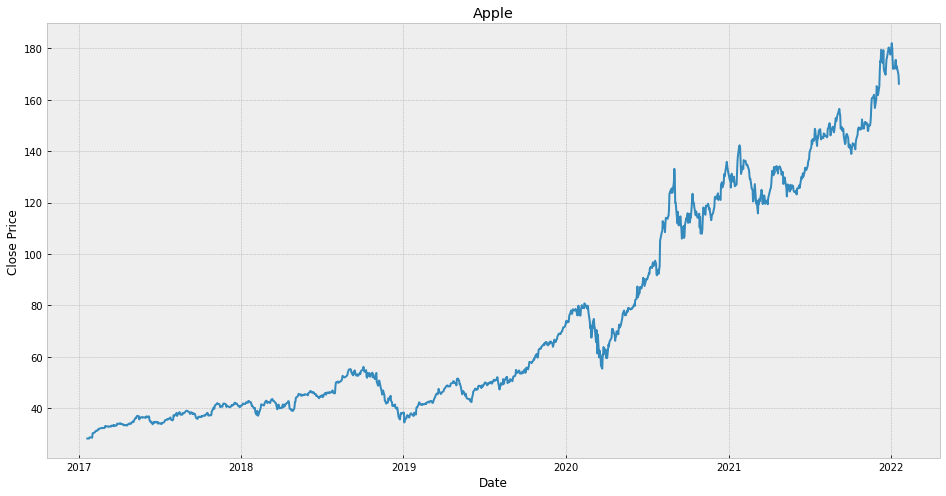

In [7]:
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [8]:
df=df['Close']

In [9]:
df=df.to_frame()

In [10]:
df.tail()

,Close
Date,
2022-01-12,175.529999
2022-01-13,172.190002
2022-01-14,173.070007
2022-01-18,169.800003
2022-01-19,166.229996


In [11]:
#create variable to preidct 'x' days out into the future
future_days = 25
#create a new column (target) shifted 'x' days up
df['prediction']=df[['Close']].shift(-future_days)
df.tail(26)

,Close,prediction
Date,,
2021-12-13,175.740005,166.229996
2021-12-14,174.330002,NaN
2021-12-15,179.300003,NaN
2021-12-16,172.259995,NaN
2021-12-17,171.139999,NaN
2021-12-20,169.750000,NaN
2021-12-21,172.990005,NaN
2021-12-22,175.639999,NaN
2021-12-23,176.279999,NaN


In [12]:
#create the feature data set (x) and convert it to a numpy array and remove the last x rows
x = np.array(df.drop(['prediction'], 1))[:-future_days]

C:\Users\Tom\AppData\Local\Temp/ipykernel_11292/3240187004.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(df.drop(['prediction'], 1))[:-future_days]


In [13]:
print(x)

[[ 28.23845482]
 [ 28.25728226]
 [ 28.23139763]
 ...
 [174.55999756]
 [179.44999695]
 [175.74000549]]


In [14]:
#create the target data set (y) convert to numpy array. Get all target values except last 'x' days
y=np.array(df['prediction'])[:-future_days]
print(y)

[ 32.36213303  32.37631607  33.03806305 ... 173.07000732 169.80000305
 166.22999573]


In [15]:
#split data into 75% training and 25% testing
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25)

In [16]:
#create the models: decision tree regressor and linear regression
tree=DecisionTreeRegressor().fit(x_train, y_train)
lr=LinearRegression().fit(x_train, y_train)

In [17]:
#get the last x rows of the feature dataset
x_future=df.drop(['prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

C:\Users\Tom\AppData\Local\Temp/ipykernel_11292/533148128.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future=df.drop(['prediction'],1)[:-future_days]


array([[150.44000244],
       [150.80999756],
       [147.91999817],
       [147.86999512],
       [149.99000549],
       [150.        ],
       [151.        ],
       [153.49000549],
       [157.86999512],
       [160.55000305],
       [161.02000427],
       [161.41000366],
       [161.94000244],
       [156.80999756],
       [160.24000549],
       [165.30000305],
       [164.77000427],
       [163.75999451],
       [161.83999634],
       [165.32000732],
       [171.17999268],
       [175.08000183],
       [174.55999756],
       [179.44999695],
       [175.74000549]])

In [18]:
#show tree prediction and linear model
tree_prediction=tree.predict(x_future)
print('tree prediction:', tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print('lr prediction:', lr_prediction)

tree prediction: [174.33000183 179.30000305 148.54319763 148.54319763 172.99000549
 172.99000549 175.63999939 142.69174194 180.33000183 179.28999329
 179.38000488 178.19999695 177.57000732 182.00999451 179.28999329
 174.91999817 172.         172.         172.19000244 174.91999817
 175.52999878 172.19000244 173.07000732 169.80000305 166.22999573]

lr prediction: [155.36527582 155.74599491 152.77223149 152.72077915 154.90223611
 154.9125203  155.9415044  158.50368046 163.01062013 165.76830568
 166.25192946 166.65323264 167.19859295 161.9198995  165.44932312
 170.65598015 170.11061984 169.07133585 167.09568826 170.67656423
 176.70639598 180.71944338 180.18436725 185.21609887 181.39857665]


In [19]:
df_n = pd.DataFrame(lr_prediction, columns = ['Column_A'])
df_n

,Column_A
0,155.365276
1,155.745995
2,152.772231
3,152.720779
4,154.902236
5,154.912520
6,155.941504
7,158.503680
8,163.010620
9,165.768306


In [20]:
df_t = pd.DataFrame(tree_prediction, columns = ['Column_B'])
df_t

,Column_B
0,174.330002
1,179.300003
2,148.543198
3,148.543198
4,172.990005
5,172.990005
6,175.639999
7,142.691742
8,180.330002
9,179.289993


In [21]:
df.reset_index(inplace=True)
df

,Date,Close,prediction
0,2017-01-20,28.238455,32.362133
1,2017-01-23,28.257282,32.376316
2,2017-01-24,28.231398,33.038063
3,2017-01-25,28.680857,32.841900
4,2017-01-26,28.694977,33.035702
...,...,...,...
1254,2022-01-12,175.529999,NaN
1255,2022-01-13,172.190002,NaN
1256,2022-01-14,173.070007,NaN
1257,2022-01-18,169.800003,NaN


In [22]:
date=df['Date']
date

0      2017-01-20
1      2017-01-23
2      2017-01-24
3      2017-01-25
4      2017-01-26
          ...    
1254   2022-01-12
1255   2022-01-13
1256   2022-01-14
1257   2022-01-18
1258   2022-01-19
Name: Date, Length: 1259, dtype: datetime64[ns]

In [23]:
date=date.to_frame()
date

,Date
0,2017-01-20
1,2017-01-23
2,2017-01-24
3,2017-01-25
4,2017-01-26
...,...
1254,2022-01-12
1255,2022-01-13
1256,2022-01-14
1257,2022-01-18


In [24]:
date.to_excel(r'C:\Users\Tom\Documents\date data.xlsx', index = False)

In [25]:
date=pd.read_excel('date data.xlsx')
date.tail()

,Date
1281,2022-02-10
1282,2022-02-11
1283,2022-02-12
1284,2022-02-13
1285,2022-02-14


In [26]:
dfc=df['Close']
dfc.head()

0    28.238455
1    28.257282
2    28.231398
3    28.680857
4    28.694977
Name: Close, dtype: float64

In [27]:
df_k=df_n.squeeze()

In [28]:
dfr=dfc.append(df_k, ignore_index = True)

In [29]:
dfr=dfr.to_frame()

In [30]:
dfl=df['Close']
dfl.head()

0    28.238455
1    28.257282
2    28.231398
3    28.680857
4    28.694977
Name: Close, dtype: float64

In [31]:
df_p=df_t.squeeze()

In [32]:
dfl=dfl.append(df_p, ignore_index = True)

In [33]:
dfl=dfl.to_frame()

In [34]:
df_pop = pd.concat([date, dfr, dfl],axis=1)

In [35]:
df_pop

,Date,0,0
0,2017-01-19,28.238455,28.238455
1,2017-01-20,28.257282,28.257282
2,2017-01-23,28.231398,28.231398
3,2017-01-24,28.680857,28.680857
4,2017-01-25,28.694977,28.694977
...,...,...,...
1281,2022-02-10,180.184367,173.070007
1282,2022-02-11,185.216099,169.800003
1283,2022-02-12,181.398577,166.229996
1284,2022-02-13,NaN,NaN


In [36]:
df_pop.rename(columns = {0:'LR', 0:'DTR'}, inplace = True)
df_pop

,Date,DTR,DTR
0,2017-01-19,28.238455,28.238455
1,2017-01-20,28.257282,28.257282
2,2017-01-23,28.231398,28.231398
3,2017-01-24,28.680857,28.680857
4,2017-01-25,28.694977,28.694977
...,...,...,...
1281,2022-02-10,180.184367,173.070007
1282,2022-02-11,185.216099,169.800003
1283,2022-02-12,181.398577,166.229996
1284,2022-02-13,NaN,NaN


In [37]:
dfpop=df_pop.set_index('Date')

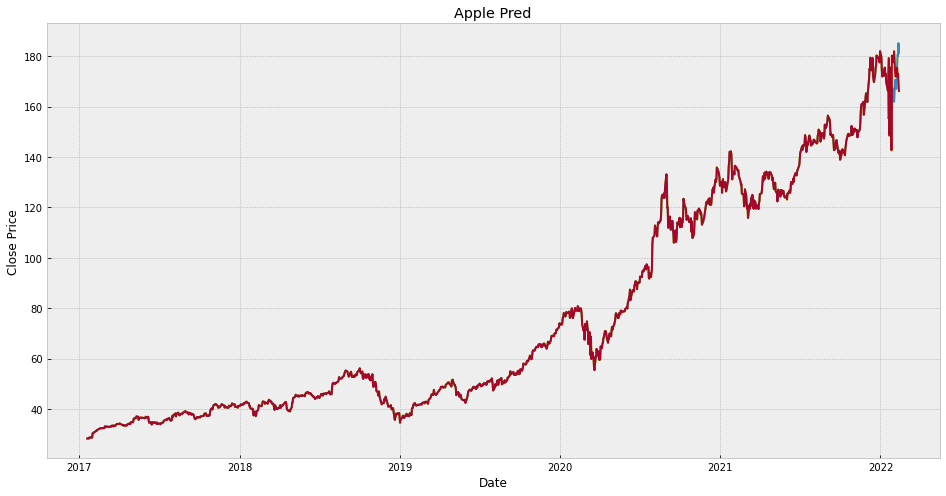

In [41]:
plt.figure(figsize=(16,8))
plt.title('Apple Pred')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(dfpop['DTR'], color='yellow')
plt.plot(dfpop['DTR'])
plt.show()